Primal-Dual Proximal Splitting
==============================
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


This tour explores a primal-dual proximal splitting algorithm,
with application to imaging problems.

In [1]:
using NtToolBox
using PyPlot

Convex Optimization with a Primal-Dual Scheme
---------------------------------------------
In this tour we use the
primal-dual algorithm detailed in:


Antonin Chambolle and Thomas Pock
_A First-order primal-dual algorithm for convex problems with application to imaging,_
Journal of Mathematical Imaging and Vision,
Volume 40, Number 1 (2011), 120-145


One should note that there exist many other primal-dual schemes.


We consider general optimization problems of the form
$$ \umin{f} F(K(f)) + G(f) $$
where $F$ and $G$ are convex functions and $K : f \mapsto K(f)$
is a linear operator.


For the primal-dual algorithm to be applicable, one should be able to
compute the proximal mapping of $F$ and $G$, defined as:
$$ \text{Prox}_{\gamma F}(x) = \uargmin{y} \frac{1}{2}\norm{x-y}^2 + \ga F(y) $$
(the same definition applies also for $G$).


The algorithm reads:
$$ g_{k+1} = \text{Prox}_{\sigma F^*}( g_k + \sigma K(\tilde f_k) $$
$$ f_{k+1} = \text{Prox}_{\tau G}(  f_k-\tau K^*(g_k) ) $$
$$ \tilde f_{k+1} = f_{k+1} + \theta (f_{k+1} - f_k) $$


The dual functional is defined as
$$ F^*(y) = \umax{x} \dotp{x}{y}-F(x). $$
Note that being able to compute the proximal mapping of $F$ is
equivalent to being able to compute the proximal mapping of $F^*$,
thanks to Moreau's identity:
$$ x = \text{Prox}_{\tau F^*}(x) + \tau \text{Prox}_{F/\tau}(x/\tau) $$


It can be shown that in the case $\theta=1$, if
$\sigma \tau \norm{K}^2<1$, then $f_k$ converges to a minimizer of
the original minimization of $F(K(f)) + G(f)$.


More general primal-dual schemes have been developped, see for instance


L. Condat,
_A primal-dual splitting method for convex optimization involving Lipschitzian, proximable and linear composite terms,_
J. Optimization Theory and Applications, 2013, in press.


Inpainting Problem
------------------
We consider a linear imaging operator $\Phi : f \mapsto \Phi(f)$
that maps high resolution images to low dimensional observations.
Here we consider a pixel masking operator, that is diagonal over the
spacial domain.


Load an image.

In [2]:
n=256
f0 = load_image("NtToolBox/src/data/lena.png")
s1,s2=size(f0)
f0 = f0[Base.div(s1-n,2):Base.div(s1-n,2)+n-1, Base.div(s2-n,2):Base.div(s2-n,2)+n-1];

Display it.

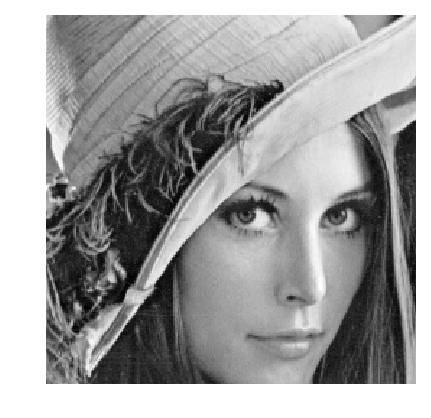

In [3]:
imageplot(f0);

We consider here the inpainting problem. This simply corresponds to a
masking operator.


Load a random mask $\La$.

In [4]:
rho = .8
Lambda = rand(n,n).>rho;

Masking operator $ \Phi $.

In [5]:
Phi = f -> f.*Lambda;

Compute the observations $y=\Phi f_0$.

In [6]:
y = Phi(f0);

Display it.

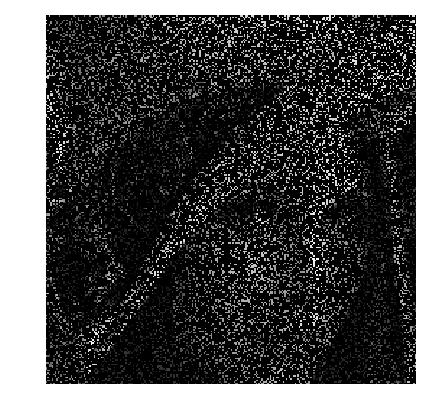

In [7]:
imageplot(y);

Total Variation Regularization under Constraints
------------------------------------------------
We want to solve the noiseless inverse problem $y=\Phi f$ using a total
variation regularization:
$$ \umin{ y=\Phi f } \norm{\nabla f}_1 $$


This can be recasted as the minimization of $F(K(f)) + G(f)$ by
introducing
$$ G(f)=i_H(f), \quad F(u)=\norm{u}_1 \qandq K=\nabla, $$
where $H = \enscond{x}{\Phi(x)=y}$ is an affine space, and $i_H$ is the indicator
function
$$ i_H(x) = \choice{ 0 \qifq x \in H, \\ +\infty \qifq x \notin H. } $$


Shorcut for the operators.

In [8]:
K  = f -> Grad(f)
KS = u -> -Div(u[:,:,1],u[:,:,2]);

Shortcut for the TV norm.

In [9]:
Amplitude = u -> sqrt(sum(u.^2,3));
F = u -> sum(sum(Amplitude(u)));

The proximal operator of the vectorial $\ell^1$ norm reads
$$ \text{Prox}_{\lambda F}(u) = \max\pa{0,1-\frac{\la}{\norm{u_k}}} u_k $$

In [10]:
ProxF = (u,lambda) -> max(0,1-lambda./repeat(Amplitude(u), outer=(1, 1, 2))).*u;

Display the thresholding on the vertical component of the vector.

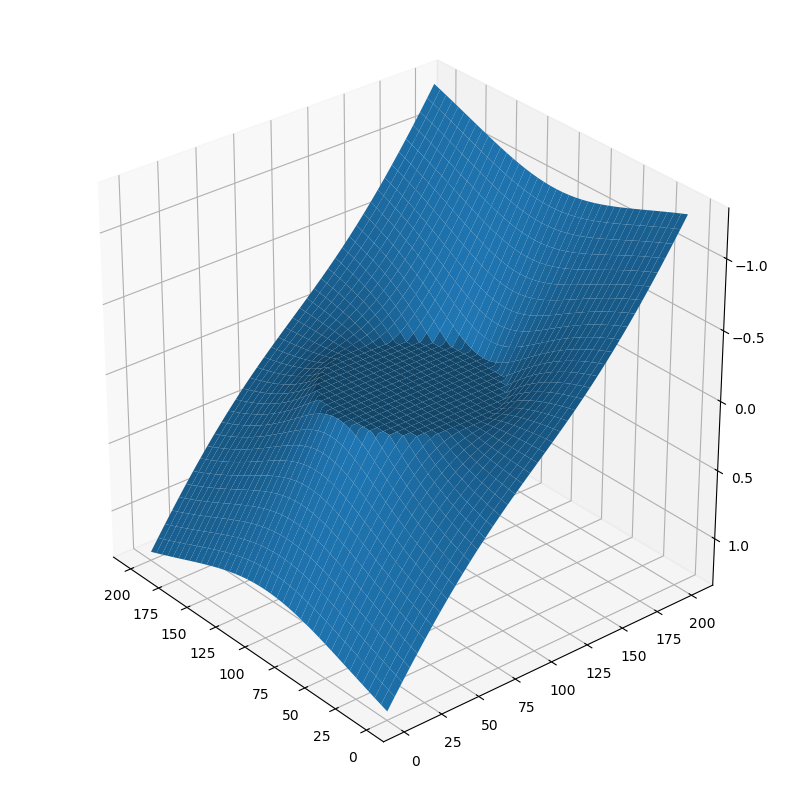

In [11]:
figure(figsize=(10,10))
ax = gca(projection="3d")
t = -linspace(-2,2, 201);
(Y,X) = meshgrid(t,t);
U = cat(3,Y,X);
V = ProxF(U,1);
# 3D display
surf(V[:,:,1]); 
set_cmap("jet")
#ax[:view](-150, 40)
#gca()[:invert_zaxis]()
ax[:view_init](-150, 40)

#axis("tight");
#camlight;
#shading interp;

For any 1-homogeneous convex
functional, the dual function is the indicator of a convex set. For
the $\ell^1$ norm, it is the indicator of the $\ell^\infty$ ball
$$ F^* = i_{\norm{\cdot}_\infty \leq 1}
 \qwhereq  \norm{u}_\infty = \umax{i} \norm{u_i}. $$


The proximal operator of the dual function is hence a projector (and it
does not depend on $\sigma$ )
$$ \text{Prox}_{\sigma F^*}(u) = \text{Proj}_{\norm{\cdot}_\infty \leq 1}(u). $$


A simple way to compute the proximal operator of the dual function $F^*$, we
make use of Moreau's identity:
  $$ x = \text{Prox}_{\tau F^*}(x) + \tau \text{Prox}_{F/\tau}(x/\tau) $$

In [12]:
ProxFS = (y,sigma) -> y-sigma*ProxF(y/sigma,1/sigma);

Display this dual proximal on the vertical component of the vector.

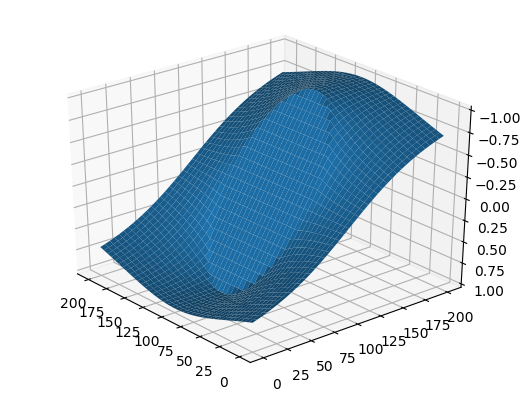

In [13]:
V = ProxFS(U,1);
# display
surf(V[:,:,1]);
set_cmap("jet")
gca()[:view_init](-150, 40)
axis("tight");
#camlight; shading interp;

The proximal operator of $G = i_H$ is the projector on $H$. In our
case, since $\Phi$ is a diagonal so that the projection is simple to
compute
$$ \text{Prox}_{\tau G}(f) = \text{Proj}_{H}(f) = f + \Phi(y - \Phi(f)) $$

In [14]:
ProxG = (f,tau) -> f + Phi(y - Phi(f));

Primal-dual Total Variation Regularization Algorithm
----------------------------------------------------
Now we can apply the primal dual scheme to the TV regularization problem.


We set parameters for the algorithm.
Note that in our case, $L=\norm{K}^2=8$.
One should has $L \sigma \tau < 1$.

In [15]:
L = 8;
sigma = 10;
tau = .9/(L*sigma);
theta = 1;

Initialization, here |f| stands for the current iterate $f_k$,
|g| for $g_k$ and |f1| for $\tilde f_k$.

In [16]:
f = y;
g = K(y)*0;
f1 = f;

Example of one iterations.

In [17]:
fold = f;
g = ProxFS( g+sigma*K(f1), sigma);
f = ProxG(  f-tau*KS(g), tau);
f1 = f + theta * (f-fold);

__Exercise 1__

Implement the primal-dual algorithm.
Monitor the evolution of the TV energy $F(K(f_k))$
during the iterations.
Note that one always has $ f_k \in H $ so that the iterates
satisfies the constraints.

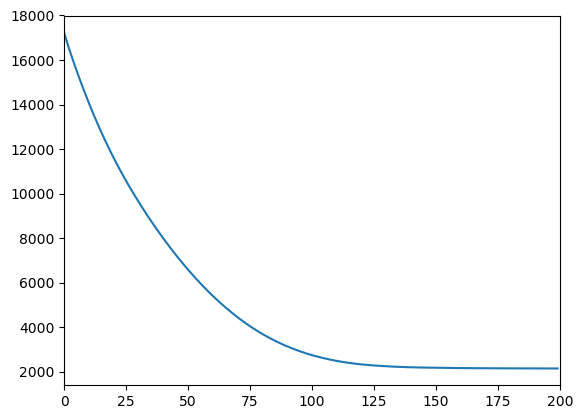

(0,200)

In [18]:
include("NtSolutions/optim_5_primal_dual/exo1.jl")

In [19]:
# Insert your code here.

Display inpainted image.

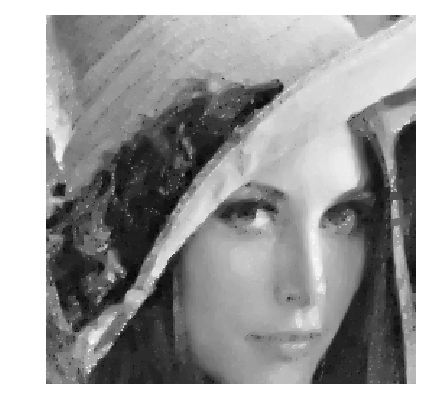

In [20]:
imageplot(f);

__Exercise 2__

Use the primal dual scheme to perform regularization in the presence of
noise
$$ \umin{\norm{y-\Phi(f)} \leq \epsilon} \norm{\nabla f}_1. $$

In [21]:
include("NtSolutions/optim_5_primal_dual/exo2.jl")

In [22]:
# Insert your code here.

Inpainting Large Missing Regions
--------------------------------
It is possible to consider a more challening problem of inpainting large
missing regions.


To emphasis the effect of the TV functional, we use a simple geometric
image.

In [23]:
n=64
radius = 0.6;
x = linspace(-1,1,n)
Y,X = meshgrid(x,x)
f0 = Int.(max( abs(X),abs(Y) ).<radius);

We remove the central part of the image.

In [25]:
a = 4
Lambda = ones(n)
Lambda[Base.div(end,2)-a:Base.div(end,2)+a,:] = 0
Phi = f -> f.*Lambda;

Display.

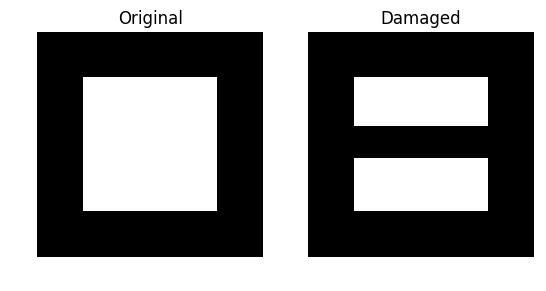

In [26]:
imageplot(f0, "Original", [1,2,1])
imageplot(Phi(f0), "Damaged", [1,2,2]);

__Exercise 3__

Display the evolution of the inpainting process.

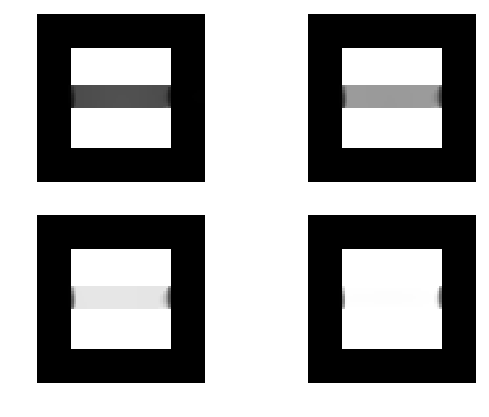

In [27]:
include("NtSolutions/optim_5_primal_dual/exo3.jl")

In [28]:
# Insert your code here.